# 레퍼런스 기반

In [42]:
import pandas as pd
import numpy as np

# 데이터 열기

In [43]:
data = pd.read_excel("../data/eBayAuctions.xls")

In [44]:
data.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [45]:
data.tail()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1
1971,Automotive,US,145,7,Sat,999.00,999.00,0


## 결측치 확인

In [46]:
data.isnull().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [47]:
data.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926026,0.540568
std,5973.011033,2.052906,89.493858,38.856214,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


# 변수변환
1. Competitive?의 이름 바꾸기
2. Competitive : 범주형으로 변환하기
3. Duration : 범주형으로 변환하기

In [48]:
data = data.rename(columns={'Competitive?' : 'Competitive'})

In [49]:
data['Competitive'] = data['Competitive'].astype('category')

In [50]:
data['Duration'] = data['Duration'].astype('category')

# EDA 수행

1. 범주형 변수 / 수치형 변수 구분 
2. 범주형 변수에서 level 확인
3. 수치형 변수의 히스토그램, 박스플롯 그리기

In [51]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

## 범주형 / 수치형 구분

In [52]:
numeric = data.select_dtypes(include = np.number)
category = data.select_dtypes(exclude = np.number)

In [53]:
numeric_list = numeric.columns.tolist()
category_list = category.columns.tolist()

## 범주형 변수

### level 확인

In [54]:
print(category_list)

['Category', 'currency', 'Duration', 'endDay', 'Competitive']


In [55]:
data['Category'].value_counts()

Category
Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: count, dtype: int64

In [56]:
data['currency'].value_counts()

currency
US     1292
EUR     533
GBP     147
Name: count, dtype: int64

In [57]:
data['Duration'].value_counts()

Duration
7     967
5     466
10    303
3     213
1      23
Name: count, dtype: int64

In [58]:
data['endDay'].value_counts()

endDay
Mon    548
Sat    351
Sun    338
Fri    287
Thu    202
Tue    171
Wed     75
Name: count, dtype: int64

In [59]:
data['Competitive'].value_counts()

Competitive
1    1066
0     906
Name: count, dtype: int64

### 도수분포표

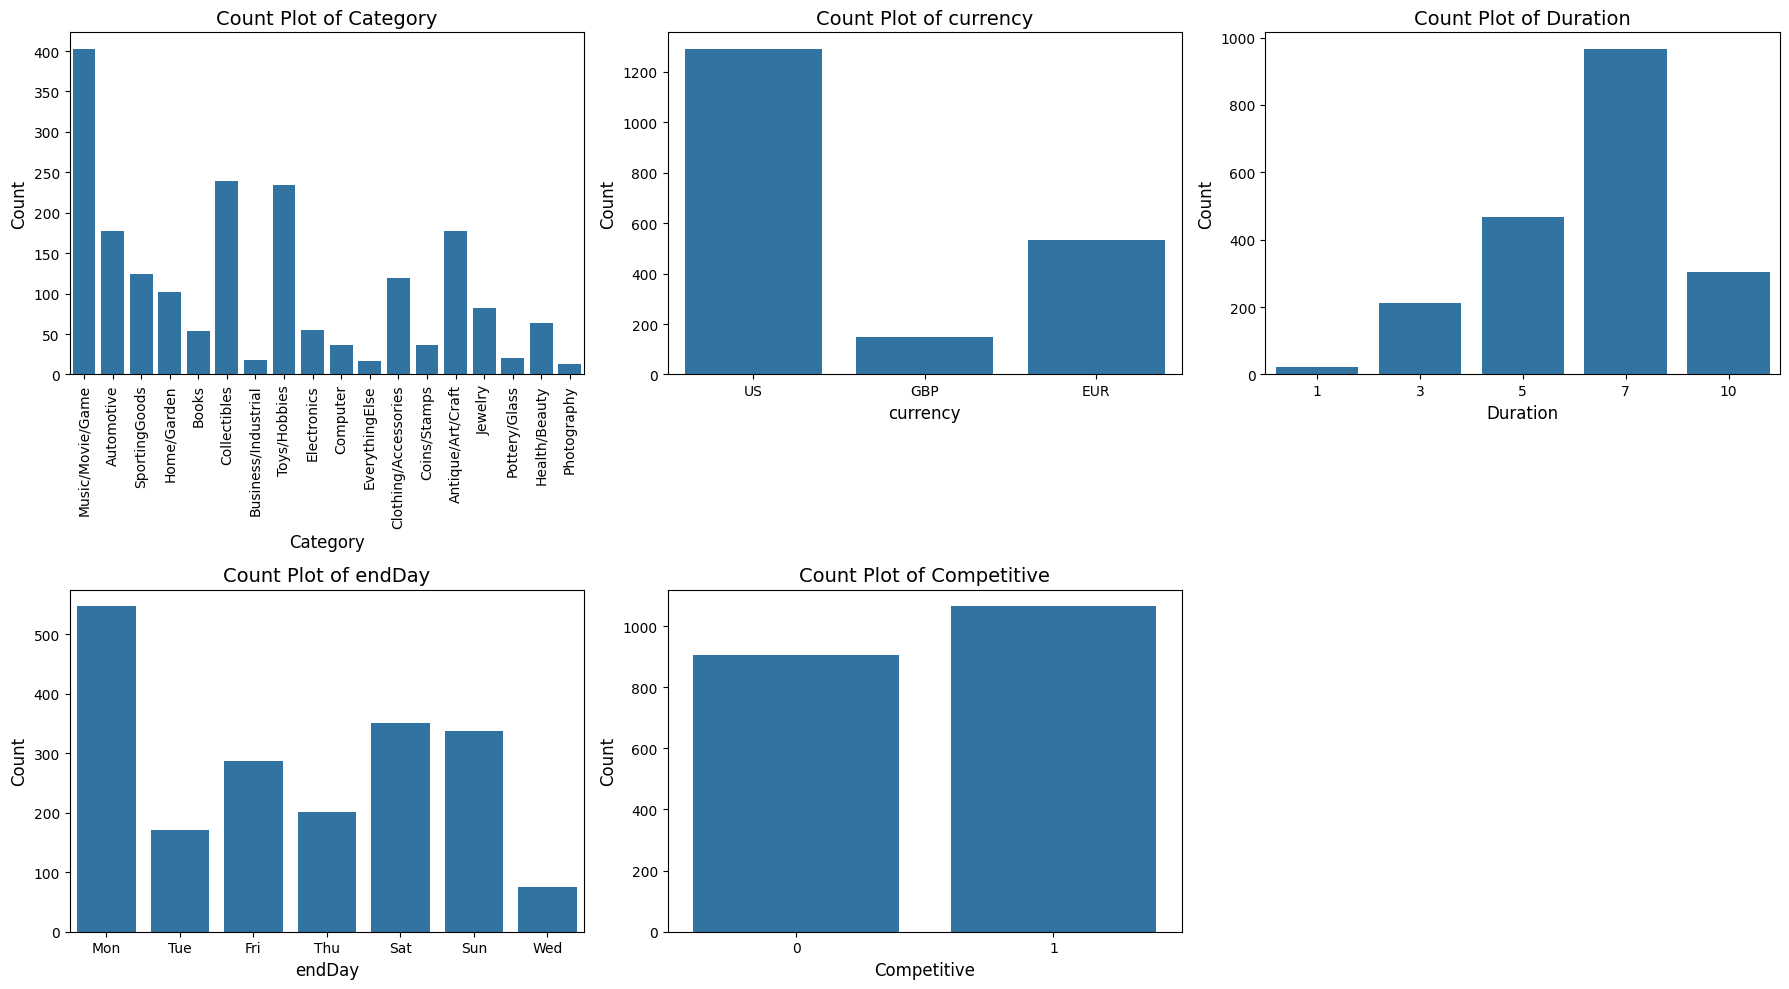

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(category_list):
	sns.countplot(x = var, data = data, ax = axes[i])
	axes[i].set_title(f'Count Plot of {var}', fontsize=14)
	axes[i].set_xlabel(var, fontsize = 12)
	axes[i].set_ylabel('Count', fontsize = 12)
	if var == 'Category':
		axes[i].tick_params(axis='x', rotation = 90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 수치형 변수

In [61]:
numeric_list

['sellerRating', 'ClosePrice', 'OpenPrice']

### 히스토그램

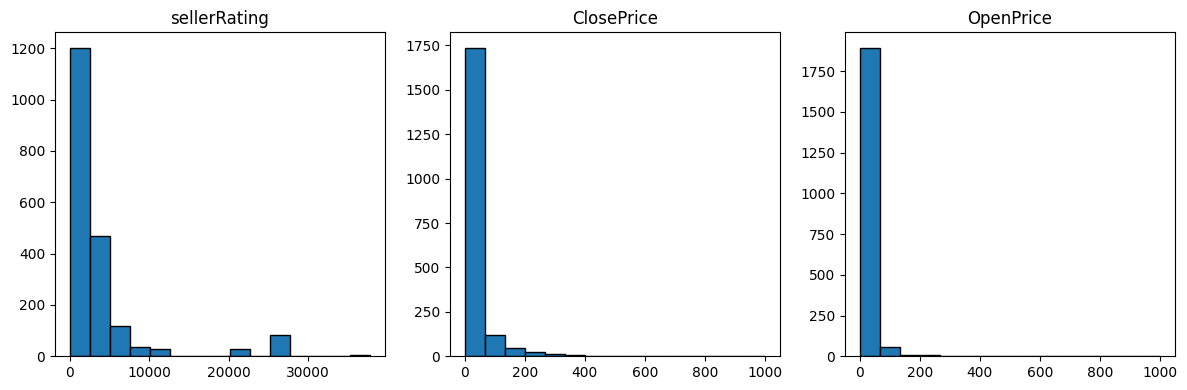

In [62]:
plt.figure(figsize = (12, 4))

for i, var in enumerate(numeric_list, start = 1):
	plt.subplot(1, 3, i)
	plt.hist(data[var], bins = 15, edgecolor = 'black')
	plt.title(f'{var}')
plt.tight_layout()
plt.show()

### 상관관계 파악

In [63]:
data[numeric_list].corr()

,sellerRating,ClosePrice,OpenPrice
sellerRating,1.000000,0.000158,-0.041111
ClosePrice,0.000158,1.000000,0.476932
OpenPrice,-0.041111,0.476932,1.000000


### 박스플롯 그리기

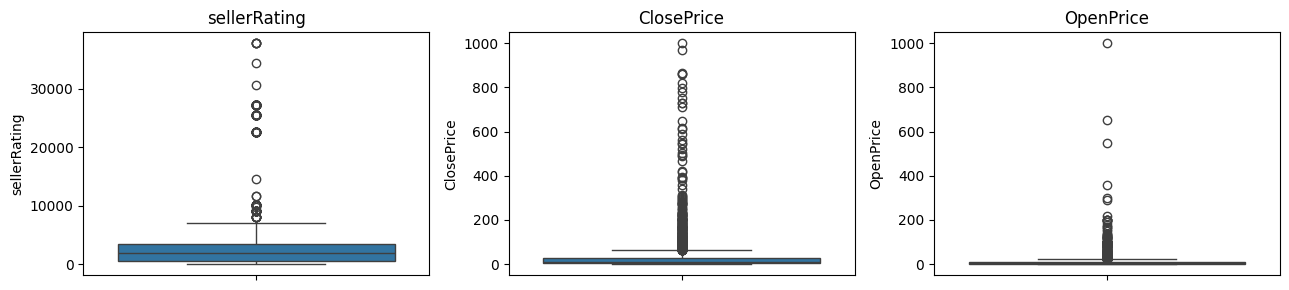

In [64]:
fig, axes = plt.subplots(1, 3, figsize = (13, 3))
axes = axes.flatten()
for i, var in enumerate(numeric_list, start = 0):
	sns.boxplot(y = var, data = data, ax = axes[i])
	axes[i].set_title(f"{var}")
plt.tight_layout()
plt.show()

## 결론
* 수치형 변수에서 이상치에 해당하는 값 발생.
* sellerRating, Closeprice, OpenPrice에 각각 이상치에 해당하는 값 발생.
* 어떻게 처리할지 고민해야 함.

# 이상치 제거
* (99백분위수) * 2를 넘는 값을 처리
* sellerRating : 10 이하 값 제거

In [65]:
threshold = []
for i, var in enumerate(numeric_list):
	percentile_99 = np.percentile(data[var], 99)
	result = 2 * percentile_99
	threshold.append(result)
	print(f"{var} : {result}")

sellerRating : 54264.0
ClosePrice : 1014.3733999433689
OpenPrice : 265.15999999999985


In [66]:
for i, var in enumerate(numeric_list):
	data = data[data[var] <= threshold[i]]

In [67]:
data = data[data['sellerRating'] >= 10]

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 1966
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Category      1936 non-null   object  
 1   currency      1936 non-null   object  
 2   sellerRating  1936 non-null   int64   
 3   Duration      1936 non-null   category
 4   endDay        1936 non-null   object  
 5   ClosePrice    1936 non-null   float64 
 6   OpenPrice     1936 non-null   float64 
 7   Competitive   1936 non-null   category
dtypes: category(2), float64(2), int64(1), object(3)
memory usage: 110.0+ KB


## 표본 추출
* 모형 구축을 위해 Competitive가 0인 자료와 1인 자료의 비율을 비교
* 0과 1의 비율이 비슷하기 때문에 가중치를 넣을 필요는 없을 듯하다.

In [69]:
frequency = data['Competitive'].value_counts().sort_index()
percentage = np.round(data['Competitive'].value_counts(normalize=True).sort_index() * 100, 2)
cumulative_frequency = frequency.cumsum()
cumulative_percentage = percentage.cumsum()

result = pd.DataFrame({
    'Frequency': frequency,
    'Percentage': percentage,
    'Cumul Freq': cumulative_frequency,
    'Cumul Percent': cumulative_percentage
})
print(result)


             Frequency  Percentage  Cumul Freq  Cumul Percent
Competitive                                                  
0                  898       46.38         898          46.38
1                 1038       53.62        1936         100.00


# 새로운 변수 추가

In [70]:
data['diffPrice'] = data['ClosePrice'] - data['OpenPrice']
data['diffRatio'] = data['ClosePrice'] / data['OpenPrice']

In [71]:
data['PriceRatio'] = (data['ClosePrice'] - data['OpenPrice']) / data['OpenPrice']

In [72]:
data['Duration'].head()

0    5
1    5
2    5
3    5
4    5
Name: Duration, dtype: category
Categories (5, int64): [1, 3, 5, 7, 10]

In [73]:
data['Duration2'] = data['Duration'].cat.codes

In [74]:
data['diffPriceDay'] = (data['ClosePrice'] - data['OpenPrice']) / data['Duration2']
del data['Duration2']

In [75]:
data['diffPriceDay'].isnull().sum()

10

In [76]:
data['peekDay'] = data['endDay'].apply(lambda x: '1' if x in ['Mon', 'Sun', 'Sat', 'Fri'] else '0')

In [77]:
data = data.dropna(subset=['diffPriceDay'])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1926 entries, 0 to 1966
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Category      1926 non-null   object  
 1   currency      1926 non-null   object  
 2   sellerRating  1926 non-null   int64   
 3   Duration      1926 non-null   category
 4   endDay        1926 non-null   object  
 5   ClosePrice    1926 non-null   float64 
 6   OpenPrice     1926 non-null   float64 
 7   Competitive   1926 non-null   category
 8   diffPrice     1926 non-null   float64 
 9   diffRatio     1926 non-null   float64 
 10  PriceRatio    1926 non-null   float64 
 11  diffPriceDay  1926 non-null   float64 
 12  peekDay       1926 non-null   object  
dtypes: category(2), float64(6), int64(1), object(4)
memory usage: 184.7+ KB


## 카이제곱검정 시행
* 수치형 변수에 대한 검정 시행
* 기존 변수 3개 (sellerRating, ClosePrice, OpenPrice)
* 새로운 변수 4개 (diffPrice, diffRatio, PriceRatio, diffPriceDay)

In [79]:
from scipy.stats import chi2_contingency

def chi_square_test(df, target, variable):
    contingency_table = pd.crosstab(df[target], df[variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

In [80]:
columns = data.select_dtypes(include = np.number).columns.tolist()
columns

['sellerRating',
 'ClosePrice',
 'OpenPrice',
 'diffPrice',
 'diffRatio',
 'PriceRatio',
 'diffPriceDay']

In [89]:
results = []
for column in columns:
	chi2, p = chi_square_test(data, 'Competitive', column)
	results.append((column, chi2, p))

In [90]:
results_df = pd.DataFrame(results, columns=['Effect', 'Score Chi-Square', 'Pr > ChiSq'])
print(results_df)

         Effect  Score Chi-Square    Pr > ChiSq
0  sellerRating        952.482849  1.592320e-39
1    ClosePrice       1533.196169  1.126891e-45
2     OpenPrice       1062.010580  1.259446e-34
3     diffPrice       1780.790521  4.265964e-75
4     diffRatio       1772.875848  3.104136e-66
5    PriceRatio       1776.095376  1.725428e-65
6  diffPriceDay       1777.746416  7.833269e-66


## 범주형 변수의 지시변수화

In [ ]:
data['sellerRating_low1']
data['sellerRating_low2']

In [ ]:
data['ClosePrice_low']

In [ ]:
data['OpenPrice_low1']
data['OpenPrice_low2']

# 변수선정 및 적합

## 데이터 나누기